# Checking Tensorflow version and Confirming GPU setup

In [4]:
# import tensorflow as tf
# print("TensorFlow version:", tf.__version__)
# print("Num GPUs Available:", len(tf.config.list_physical_devices('GPU')))
# print("GPU Devices:", tf.config.list_physical_devices('GPU'))


TensorFlow version: 2.10.0
Num GPUs Available: 1
GPU Devices: [PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


# Installing and upgrading some relevant packages
### Tensorflow is already installed in the Dev Container 


In [2]:
#!python -m pip install --upgrade --no-cache-dir pip --root-user-action
!pip install --no-cache-dir pandas matplotlib scikit-learn plotly numpy kaggle --root-user-action
!pip install --upgrade --no-cache-dir typing_extensions --root-user-action


     |████████████████████████████████| 1.8 MB 1.5 MB/s eta 0:00:01
  Attempting uninstall: pip
    Found existing installation: pip 20.2.4
    Uninstalling pip-20.2.4:
      Successfully uninstalled pip-20.2.4
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.4/12.4 MB 272.9 kB/s eta 0:00:00m eta 0:00:010:02:04
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.1/11.1 MB 681.0 kB/s eta 0:00:001m690.1 kB/s eta 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.8/14.8 MB 792.4 kB/s eta 0:00:00m eta 0:00:010:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 34.5/34.5 MB 529.0 kB/s eta 0:00:00m eta 0:00:010:00:02


# Importing Libraries

In [1]:
import os
import shutil
import random

from tensorflow.keras import Input
from tensorflow.keras import Model
from tensorflow.keras import models
from tensorflow.keras import layers
from tensorflow.keras import optimizers
from tensorflow.keras import callbacks
from tensorflow.keras.preprocessing.image import ImageDataGenerator

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px

from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

import helper_module as hd

import numpy as np


In [ ]:
# Connecting google drive
# # Mounting the google drive
# from google.colab import drive
# drive.mount('/content/drive')


# Dataset

### Importing the dataset from Kaggle

In [3]:
# import os
os.environ['KAGGLE_CONFIG_DIR'] = '.'


In [11]:
!kaggle datasets download -d muratkokludataset/grapevine-leaves-image-dataset


Dataset URL: https://www.kaggle.com/datasets/muratkokludataset/grapevine-leaves-image-dataset
License(s): CC0-1.0


In [12]:
# Make dir ./01_Data AND move the dataset there 
!mkdir -p ./01_Data
!mv grapevine-leaves-image-dataset.zip ./01_Data/


### Unzipping the Data & removing the zipped files afterwards

In [ ]:
!unzip ./01_Data/*.zip -d ./01_Data && rm ./01_Data/*.zip


### Class Imbalance

In [14]:
# Defining the directory where the dataset is stored
original_dir = './01_Data/Grapevine_Leaves_Image_Dataset'

# Defining subdirectories for each class within the dataset
org_Ak        = os.path.join(original_dir, 'Ak')
org_Ala_Idris = os.path.join(original_dir, 'Ala_Idris')
org_Buzgulu   = os.path.join(original_dir, 'Buzgulu')
org_Dimnit    = os.path.join(original_dir, 'Dimnit')
org_Nazli     = os.path.join(original_dir, 'Nazli')

# Counting the number of images in each class
no_of_images_belonging_to_class_Ak        = len(os.listdir(org_Ak))
no_of_images_belonging_to_class_Ala_Idris = len(os.listdir(org_Ala_Idris))
no_of_images_belonging_to_class_Buzgulu   = len(os.listdir(org_Buzgulu))
no_of_images_belonging_to_class_Dimnit    = len(os.listdir(org_Dimnit))
no_of_images_belonging_to_class_Nazli     = len(os.listdir(org_Nazli))

# Printing the number of images in each class to check for class imbalance
print(f'no_of_images_belonging_to_class_Ak:        {no_of_images_belonging_to_class_Ak}')
print(f'no_of_images_belonging_to_class_Ala_Idris: {no_of_images_belonging_to_class_Ala_Idris}')
print(f'no_of_images_belonging_to_class_Buzgulu:   {no_of_images_belonging_to_class_Buzgulu}')
print(f'no_of_images_belonging_to_class_Dimnit:    {no_of_images_belonging_to_class_Dimnit}')
print(f'no_of_images_belonging_to_class_Nazli:     {no_of_images_belonging_to_class_Nazli}')


no_of_images_belonging_to_class_Ak:        100
no_of_images_belonging_to_class_Ala_Idris: 100
no_of_images_belonging_to_class_Buzgulu:   100
no_of_images_belonging_to_class_Dimnit:    100
no_of_images_belonging_to_class_Nazli:     100


#### **There is no class imbalance, we can now move forward!**

### Creating relevant directories & transferring the data

In [21]:
# import os, shutil

# creating a directory where all of the images from all classes, will be initially transferred
# This directory will contain all of the images from all of the classes in a single folder 
try:
    initial_dataset_dir  =  './01_Data/initial'
    os.mkdir(initial_dataset_dir)
except:
    print('File exists: ./01_Data/initial')


File exists: ./01_Data/initial


In [22]:
# Transferring all of the images to the folder named 'initial'
source_folders     = [org_Ak, org_Ala_Idris, org_Buzgulu, org_Dimnit, org_Nazli]
destination_folder = initial_dataset_dir

hd.transfer_images(source_folders, destination_folder)


In [23]:
len(os.listdir(initial_dataset_dir))


500

In [24]:
# this cell creates a dictionary of image counts i.e. number of images to be
# transferred to training dataset, number of images to be transferred to validation dataset and so on..


total_images_per_class = {'Ak'       : no_of_images_belonging_to_class_Ak,
                          'Ala_Idris': no_of_images_belonging_to_class_Ala_Idris,
                          'Buzgulu'  : no_of_images_belonging_to_class_Buzgulu,
                          'Dimnit'   : no_of_images_belonging_to_class_Dimnit,
                          'Nazli'    : no_of_images_belonging_to_class_Nazli
                         }

train_percentage       = 0.60
validation_percentage  = 0.20
test_percentage        = 0.20

split_results = hd.numbers_of_images_in_splits(total_images_per_class, train_percentage, validation_percentage, test_percentage)

split_results # A dictionary of dictionaries


{'Ak': {'train': 60, 'validation': 20, 'test': 20},
 'Ala_Idris': {'train': 60, 'validation': 20, 'test': 20},
 'Buzgulu': {'train': 60, 'validation': 20, 'test': 20},
 'Dimnit': {'train': 60, 'validation': 20, 'test': 20},
 'Nazli': {'train': 60, 'validation': 20, 'test': 20}}

In [27]:
# this cell creates the destination folders train, validation & test. it also creates all of the folders of the form
# train/Ak, train/Ala_Idris etc...
# it then also transfers the images from source folder to all relevant folders!

class_names             =  ['Ak', 'Ala_Idris', 'Buzgulu', 'Dimnit', 'Nazli']
source_folder           =  initial_dataset_dir
destination_base_dir    =  initial_dataset_dir+'/grapevine_leaves'
destination_directories =  hd.create_directories(class_names, destination_base_dir)

class_to_destinations = hd.create_class_to_destinations(class_names, destination_directories, split_results)

hd.transfer_images_to_destinations(source_folder, class_to_destinations)


60 images from class 'Ak' copied to './01_Data/initial/grapevine_leaves/train/Ak'.
20 images from class 'Ak' copied to './01_Data/initial/grapevine_leaves/validation/Ak'.
20 images from class 'Ak' copied to './01_Data/initial/grapevine_leaves/test/Ak'.

60 images from class 'Ala_Idris' copied to './01_Data/initial/grapevine_leaves/train/Ala_Idris'.
20 images from class 'Ala_Idris' copied to './01_Data/initial/grapevine_leaves/validation/Ala_Idris'.
20 images from class 'Ala_Idris' copied to './01_Data/initial/grapevine_leaves/test/Ala_Idris'.

60 images from class 'Buzgulu' copied to './01_Data/initial/grapevine_leaves/train/Buzgulu'.
20 images from class 'Buzgulu' copied to './01_Data/initial/grapevine_leaves/validation/Buzgulu'.
20 images from class 'Buzgulu' copied to './01_Data/initial/grapevine_leaves/test/Buzgulu'.

60 images from class 'Dimnit' copied to './01_Data/initial/grapevine_leaves/train/Dimnit'.
20 images from class 'Dimnit' copied to './01_Data/initial/grapevine_leaves

In [22]:
# destination_directories

# Data Processing - Without Augmentation

In [2]:
# from tensorflow.keras.preprocessing.image import ImageDataGenerator
# ImageDataGenerator: specially designed for image data

train_dir       =  './01_Data/initial/grapevine_leaves/train'
validation_dir  =  './01_Data/initial/grapevine_leaves/validation'
test_dir        =  './01_Data/initial/grapevine_leaves/test'


gen  =  ImageDataGenerator(rescale=1./255)


train_generator      = gen.flow_from_directory(
                                                train_dir,
                                                target_size  =  (250, 250),
                                                batch_size   =  25,
                                                class_mode   =  'categorical')

validation_generator = gen.flow_from_directory(
                                                validation_dir,
                                                target_size      =  (250, 250),
                                                batch_size       =  25,
                                                class_mode       =  'categorical')

test_generator       = gen.flow_from_directory(
                                                test_dir,
                                                target_size      =  (250, 250),
                                                batch_size       =  25,
                                                class_mode       =  'categorical')


Found 300 images belonging to 5 classes.
Found 100 images belonging to 5 classes.
Found 100 images belonging to 5 classes.


### Typical image before data augmentation

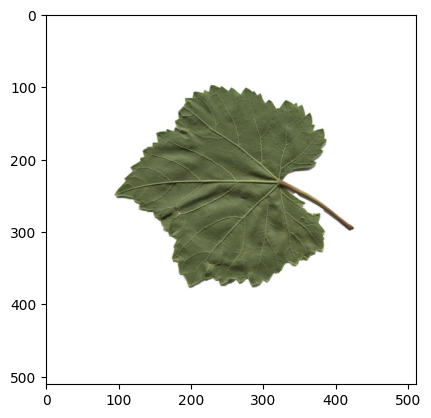

In [4]:
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt

img_path     =  train_dir + '/Buzgulu/Buzgulu (1).png'
my_img       =  image.load_img(img_path)

imgplot = plt.imshow( my_img )

plt.show()


### Typical image AFTER Data Augmentation

After processing it becomes (1, 300, 300, 3)


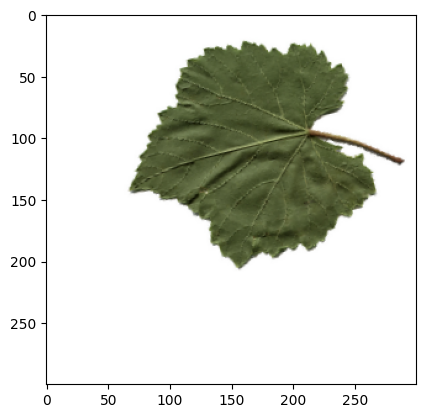

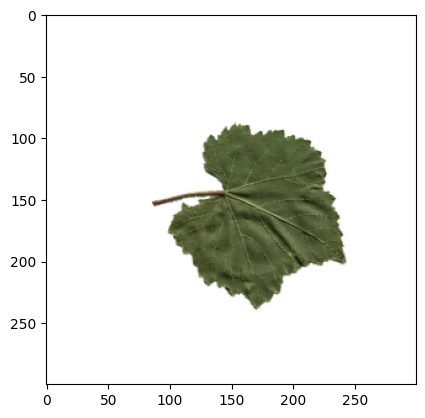

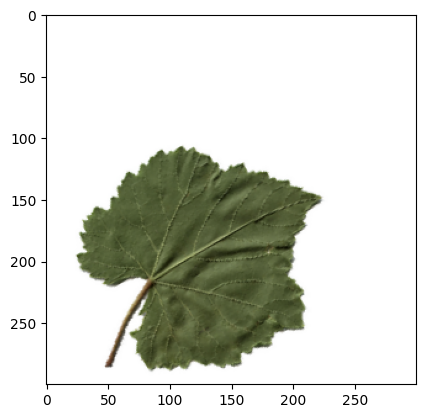

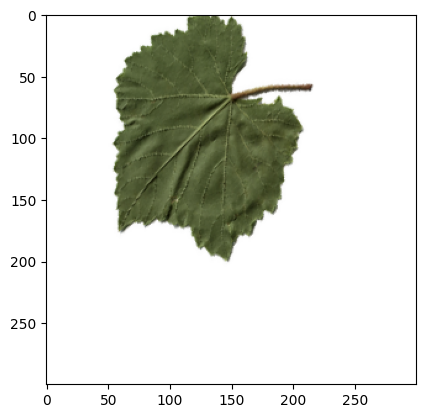

In [4]:
# # Importing necessary libraries
# from tensorflow.keras.preprocessing import image
# from tensorflow.keras.preprocessing.image import ImageDataGenerator
# import matplotlib.pyplot as plt

# Defining data augmentation settings for image processing
datagen = ImageDataGenerator(
    rotation_range     =  40,           # Rotate the image up to 40 degrees
    width_shift_range  =  0.2,          # Shift the width by up to 20%
    height_shift_range =  0.2,          # Shift the height by up to 20%
    shear_range        =  0.2,          # Shear transformation up to 20%
    zoom_range         =  0.2,          # Zoom in/out by up to 20%
    horizontal_flip    =  True,         # Flip the image horizontally
    fill_mode          = 'nearest'     # Fill points outside the boundaries with the nearest value
)

# Path to the image we want to process
img_path = train_dir + '/Buzgulu/Buzgulu (1).png'

# Loading the image and resizing it to the target size
my_img = image.load_img(img_path, target_size=(300, 300))

# Converting the image to a NumPy array
x = image.img_to_array(my_img)
x = x.reshape((1,) + x.shape)
print(f'After processing it becomes {x.shape}')


# Applying data augmentation and displaying the results
i = 0
for batch in datagen.flow(x, batch_size=1):
    plt.figure(i)
    imgplot = plt.imshow(image.array_to_img(batch[0]))
    i += 1
    if i % 4 == 0:
        break


# Showing the augmented images
plt.show()


# A Small Convnet - For setting up a baseline performance

In [32]:
# from tensorflow.keras import Input
# from tensorflow.keras import Model
# from tensorflow.keras import layers
# from tensorflow.keras import optimizers

inputs = Input(shape=(250, 250, 3))

x = layers.Conv2D(128, (3, 3), activation='relu')(inputs)
x = layers.MaxPooling2D((2, 2))(x)
x = layers.Conv2D(64, (3, 3), activation='relu')(x)
x = layers.MaxPooling2D((2, 2))(x)
x = layers.Conv2D(32, (3, 3), activation='relu')(x)
x = layers.MaxPooling2D((2, 2))(x)

x = layers.Flatten()(x)
x = layers.Dropout(0.1)(x)
x = layers.Dense(32, activation='relu')(x)
outputs = layers.Dense(5, activation='softmax')(x)

model = Model(inputs=inputs, outputs=outputs)

model.summary()


Model: "model_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_6 (InputLayer)        [(None, 250, 250, 3)]     0         
                                                                 
 conv2d_15 (Conv2D)          (None, 248, 248, 128)     3584      
                                                                 
 max_pooling2d_15 (MaxPoolin  (None, 124, 124, 128)    0         
 g2D)                                                            
                                                                 
 conv2d_16 (Conv2D)          (None, 122, 122, 64)      73792     
                                                                 
 max_pooling2d_16 (MaxPoolin  (None, 61, 61, 64)       0         
 g2D)                                                            
                                                                 
 conv2d_17 (Conv2D)          (None, 59, 59, 32)        1846

### Setting Up callbacks

In [6]:
!mkdir my_log_dir


mkdir: cannot create directory ‘my_log_dir’: File exists


In [33]:
#from tensorflow.keras import callbacks

callbacks_list = [
                    callbacks.EarlyStopping(
                        monitor   = 'val_acc',    # Available metrics are: loss, accuracy, val_loss, val_accuracy
                        patience  = 5,                 # if the val_accuracy does not increase for 5 epochs, it'll automatically stop the training
                        ),

                    callbacks.ModelCheckpoint(
                        filepath       =  'model.keras',
                        monitor        =  'val_loss',
                        save_best_only =  True,        # only the set of weights with minimum val_loss will be saved
                    ),
                    callbacks.ReduceLROnPlateau(
                        monitor   =  'val_loss',
                        factor    =  0.8,
                        patience  =  5,
                    ),
                    callbacks.TensorBoard(
                        log_dir          = 'my_log_dir',
                        histogram_freq   =  1,
                    )
                 ]


In [34]:
optimizer = optimizers.Adam(learning_rate=0.001)

model.compile(loss       =  'categorical_crossentropy',
              optimizer  =  optimizer,
              metrics    =  ['acc'])


### Training the Model

In [35]:
history = model.fit(
    train_generator,
#    batch_size      = 4,
    epochs          = 30,
    validation_data = validation_generator,
    callbacks       = callbacks_list
)


Epoch 1/30
12/12 [==============================] - 9s 688ms/step - loss: 1.6806 - acc: 0.1733 - val_loss: 1.6096 - val_acc: 0.2300 - lr: 0.0010
Epoch 2/30
12/12 [==============================] - 7s 589ms/step - loss: 1.6147 - acc: 0.2300 - val_loss: 1.6108 - val_acc: 0.2000 - lr: 0.0010
Epoch 3/30
12/12 [==============================] - 7s 584ms/step - loss: 1.6113 - acc: 0.2633 - val_loss: 1.6071 - val_acc: 0.2000 - lr: 0.0010
Epoch 4/30
12/12 [==============================] - 7s 571ms/step - loss: 1.5941 - acc: 0.2600 - val_loss: 1.5903 - val_acc: 0.3400 - lr: 0.0010
Epoch 5/30
12/12 [==============================] - 8s 591ms/step - loss: 1.5533 - acc: 0.3167 - val_loss: 1.5537 - val_acc: 0.2700 - lr: 0.0010
Epoch 6/30
12/12 [==============================] - 7s 571ms/step - loss: 1.3591 - acc: 0.4967 - val_loss: 1.6001 - val_acc: 0.2900 - lr: 0.0010
Epoch 7/30
12/12 [==============================] - 7s 574ms/step - loss: 1.0744 - acc: 0.5867 - val_loss: 1.4374 - val_acc: 0.380

In [39]:
!tensorboard --logdir=my_log_dir


^C


[click here to see LIVE tensorboard](http://localhost:6006/)


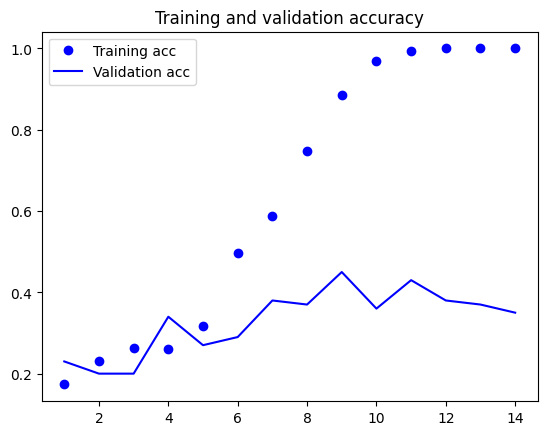

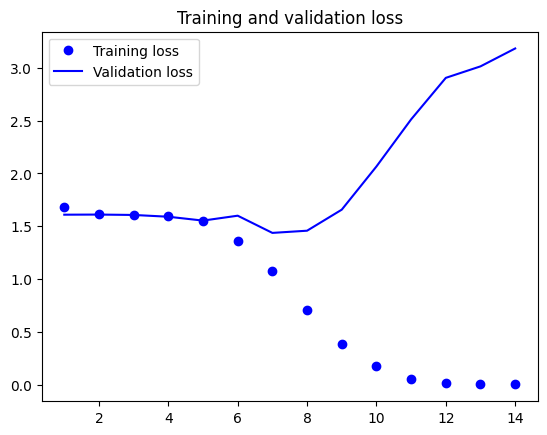

In [36]:
hd.plot_training_history(history)


### **So, the baseline accuracy is 45% on the validation dataset**.

# Transfer Learning - Feature Extraction with Data Augmentation


In [6]:
# Defining Generators for Data Processing

train_dir       =  './01_Data/initial/grapevine_leaves/train'
validation_dir  =  './01_Data/initial/grapevine_leaves/validation'
test_dir        =  './01_Data/initial/grapevine_leaves/test'


train_datagen = ImageDataGenerator(
                  rescale             =  1./255,
                  rotation_range      =  40,
                  width_shift_range   =  0.2,
                  height_shift_range  =  0.2,
                  shear_range         =  0.2,
                  zoom_range          =  0.2,
                  horizontal_flip     =  True,
                  fill_mode           =  'nearest')


test_datagen = ImageDataGenerator(rescale=1./255)  # this object will be used to generate both, the validation_data as-well-as test_data



train_generator = train_datagen.flow_from_directory(
                    train_dir,
                    target_size  =  (250, 250),
                    batch_size   =  25,
                    class_mode   =  'categorical')



validation_generator = test_datagen.flow_from_directory(
                        validation_dir,
                        target_size  =  (250, 250),
                        batch_size   =  25,
                        class_mode   =  'categorical')

test_generator       = test_datagen.flow_from_directory(
                        test_dir,
                        target_size  =  (250, 250),
                        batch_size   =  25,
                        class_mode   =  'categorical')


Found 300 images belonging to 5 classes.
Found 100 images belonging to 5 classes.
Found 100 images belonging to 5 classes.


In [10]:
# see notebook 3 for details of this cell
# importing the pretrained model
from tensorflow.keras.applications import VGG16


### Can experiment with other pretrained models as well

In [11]:
# Defining the convolutional base using the VGG16 pre-trained model
conv_base = VGG16(
                    weights     = 'imagenet',          # Using pre-trained weights from ImageNet dataset
                    include_top = False,               # Excluding the fully connected layers from the model
                    input_shape = (250, 250, 3)        # Defining the input shape of the images (300x300 pixels with 3 color channels)
                )


In [40]:
conv_base.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_7 (InputLayer)        [(None, 250, 250, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 250, 250, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 250, 250, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 125, 125, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 125, 125, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 125, 125, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 62, 62, 128)       0     

In [48]:
# Adding the Classifier

from tensorflow.keras import models
from tensorflow.keras import layers

model = models.Sequential()

model.add(conv_base)

model.add(layers.Flatten())

model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dense(5, activation='softmax'))


In [49]:
 model.summary()


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 7, 7, 512)         14714688  
                                                                 
 flatten_7 (Flatten)         (None, 25088)             0         
                                                                 
 dense_14 (Dense)            (None, 256)               6422784   
                                                                 
 dense_15 (Dense)            (None, 5)                 1285      
                                                                 
Total params: 21,138,757
Trainable params: 6,424,069
Non-trainable params: 14,714,688
_________________________________________________________________


In [50]:
# Freezing the Convolutional base
conv_base.trainable = False


In [51]:
model.summary()


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 7, 7, 512)         14714688  
                                                                 
 flatten_7 (Flatten)         (None, 25088)             0         
                                                                 
 dense_14 (Dense)            (None, 256)               6422784   
                                                                 
 dense_15 (Dense)            (None, 5)                 1285      
                                                                 
Total params: 21,138,757
Trainable params: 6,424,069
Non-trainable params: 14,714,688
_________________________________________________________________


### Setting up call backs

In [52]:
#from tensorflow.keras import callbacks

# early_stopping       = callbacks.EarlyStopping(
#                         monitor   = 'val_acc',    # Available metrics are: loss, accuracy, val_loss, val_accuracy
#                         patience  = 5             # if the val_accuracy does not increase for 5 epochs, it'll automatically stop the training
#                                                     )


model_checkpoint     = callbacks.ModelCheckpoint(
                        filepath          = './weights/weights_{epoch:02d}.keras',  # Saving weights with epoch number in the filename
                        monitor           = 'val_acc',  # Monitoring validation accuracy (or any other metric of your choice)
                        save_best_only    = False,      # Saving weights at every epoch
                        save_weights_only = True
                                                    )

reduce_lr_on_plateau = callbacks.ReduceLROnPlateau(
                        monitor   =  'val_loss',
                        factor    =  0.8,
                        patience  =  5
                                                    )

tensor_board         = callbacks.TensorBoard(
                        log_dir          = 'my_log_dir',
                        histogram_freq   =  1
                                                    )

#callbacks_list = [early_stopping, model_checkpoint, reduce_lr_on_plateau, tensor_board]
callbacks_list = [model_checkpoint, reduce_lr_on_plateau, tensor_board]


### Compiling & Training The model

In [53]:
optimizer = optimizers.Adam(learning_rate=0.001)
model.compile(
                optimizer  =  optimizer,
                loss       =  "categorical_crossentropy",
                metrics    =  ["acc"]
                )

# Saving the model architecture
model.save('NN_freezed.keras')


In [54]:
# generator isay 25,25 k batches ki shakal main, inputs bhi day ga and labels bhi
history           =  model.fit(train_generator,
                                epochs            =  70,
                                validation_data   =  validation_generator,
                                callbacks         =  callbacks_list
                              )


Epoch 1/70
12/12 [==============================] - 12s 995ms/step - loss: 5.5124 - acc: 0.1900 - val_loss: 3.0018 - val_acc: 0.3500 - lr: 0.0010
Epoch 2/70
12/12 [==============================] - 12s 967ms/step - loss: 1.8369 - acc: 0.3567 - val_loss: 1.5562 - val_acc: 0.3900 - lr: 0.0010
Epoch 3/70
12/12 [==============================] - 13s 1s/step - loss: 1.3201 - acc: 0.4467 - val_loss: 1.1483 - val_acc: 0.5000 - lr: 0.0010
Epoch 4/70
12/12 [==============================] - 13s 1s/step - loss: 1.0936 - acc: 0.5867 - val_loss: 0.9359 - val_acc: 0.6800 - lr: 0.0010
Epoch 5/70
12/12 [==============================] - 13s 1s/step - loss: 0.9819 - acc: 0.6367 - val_loss: 1.0181 - val_acc: 0.5300 - lr: 0.0010
Epoch 6/70
12/12 [==============================] - 12s 1s/step - loss: 1.0214 - acc: 0.6333 - val_loss: 0.8204 - val_acc: 0.6600 - lr: 0.0010
Epoch 7/70
12/12 [==============================] - 13s 1s/step - loss: 0.8394 - acc: 0.7100 - val_loss: 0.7375 - val_acc: 0.7500 - lr: 

Epoch 57/70
12/12 [==============================] - 14s 1s/step - loss: 0.2482 - acc: 0.9267 - val_loss: 0.4577 - val_acc: 0.8500 - lr: 3.2768e-04
Epoch 58/70
12/12 [==============================] - 12s 1s/step - loss: 0.2821 - acc: 0.9000 - val_loss: 0.3912 - val_acc: 0.8900 - lr: 3.2768e-04
Epoch 59/70
12/12 [==============================] - 13s 1s/step - loss: 0.2638 - acc: 0.9167 - val_loss: 0.3796 - val_acc: 0.8900 - lr: 3.2768e-04
Epoch 60/70
12/12 [==============================] - 13s 1s/step - loss: 0.2345 - acc: 0.9233 - val_loss: 0.4176 - val_acc: 0.8700 - lr: 3.2768e-04
Epoch 61/70
12/12 [==============================] - 13s 1s/step - loss: 0.2670 - acc: 0.9100 - val_loss: 0.3783 - val_acc: 0.8800 - lr: 3.2768e-04
Epoch 62/70
12/12 [==============================] - 12s 1s/step - loss: 0.2497 - acc: 0.9333 - val_loss: 0.4115 - val_acc: 0.8900 - lr: 2.6214e-04
Epoch 63/70
12/12 [==============================] - 13s 1s/step - loss: 0.2812 - acc: 0.9000 - val_loss: 0.3689

### Plotting the Results

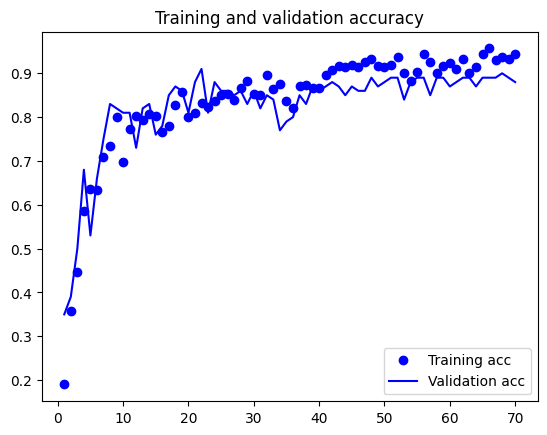

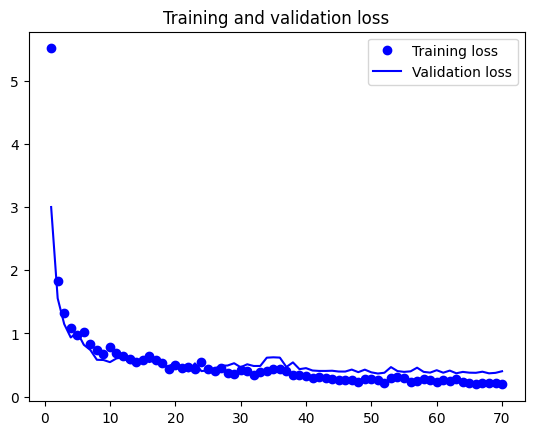

In [55]:
hd.plot_training_history(history)


### Selecting the best set of weights by comparing the performance on Training, Validation & Test Datasets

In [56]:
# # Loading the model
# model = models.load_model('NN_freezed.keras')
# # Loading a random set of weights
# path  = './weights/weights_60.keras'
# model.load_weights(path)

# the previous 'train_generator' was set-up to augment the data, that was important for mitigating overfitting. But, Now, we just want to get consistent
# accuracy scores, so, that's why we have define a new ''train_generator'' that won't augment the data
train_generator = test_datagen.flow_from_directory(
                    train_dir,
                    target_size  =  (250, 250),
                    batch_size   =  25,
                    class_mode   =  'categorical')

# path of the folder where our weights were saved after each epoch
folder_of_weights = './weights'

# one generator for each dataset
generators = [('Train', train_generator), ('Validation', validation_generator), ('Test', test_generator)]

# Generates evaluation results on all datasets, for a specified number of sets-of-weights (saved after each epoch during training).
df, checkpoint_names = hd.generate_evaluation_results(model, generators, folder_of_weights, initial_weight_index=40)
df


Found 300 images belonging to 5 classes.
4/4 [==============================] - 2s 352ms/step - loss: 0.3559 - acc: 0.8700


,Train Loss,Train Acc,Validation Loss,Validation Acc,Test Loss,Test Acc
weights_41,0.126109,0.963333,0.412785,0.87,0.361441,0.90
weights_42,0.113844,0.966667,0.406349,0.88,0.374770,0.90
weights_43,0.111299,0.970000,0.406094,0.87,0.342781,0.89
weights_44,0.114310,0.973333,0.409284,0.85,0.362876,0.90
weights_45,0.105285,0.976667,0.396812,0.87,0.345190,0.91
weights_46,0.110497,0.976667,0.396294,0.86,0.373918,0.90
weights_47,0.128020,0.950000,0.427553,0.86,0.370328,0.90
weights_48,0.112705,0.960000,0.386740,0.89,0.357184,0.88
weights_49,0.130959,0.953333,0.426674,0.87,0.376953,0.88
weights_50,0.096857,0.980000,0.383802,0.88,0.354102,0.89


In [ ]:
hd.plot_evaluation_results(df, checkpoint_names, generators, figure_height=600, figure_width=1100)


### Loading the best set of weights

In [58]:
path = './weights/weights_68.keras'
model.load_weights(path)

train_loss,      train_acc       = model.evaluate(train_generator)
validation_loss, validation_acc  = model.evaluate(validation_generator)
test_loss,       test_acc        = model.evaluate(test_generator)


4/4 [==============================] - 2s 331ms/step - loss: 0.3621 - acc: 0.9000


#### **We choose the set no. 55 because it has the best combination of accuracy scores & losses across all datasets**

### Classification Report and Confusion Matrix on Test Dataset


Found 100 images belonging to 5 classes.
4/4 [==============================] - 22s 1s/step
              precision    recall  f1-score   support

           0       0.88      0.75      0.81        20
           1       0.86      0.90      0.88        20
           2       0.86      0.95      0.90        20
           3       1.00      0.90      0.95        20
           4       0.91      1.00      0.95        20

    accuracy                           0.90       100
   macro avg       0.90      0.90      0.90       100
weighted avg       0.90      0.90      0.90       100



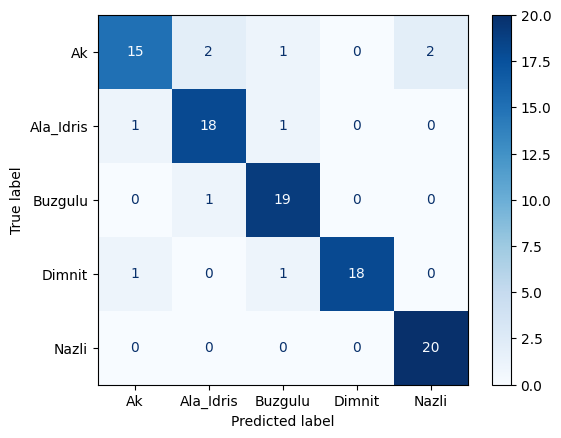

In [7]:
# # Loading the model
# model = models.load_model('NN_freezed.keras')
# # Loading a random set of weights
# path  = './weights/weights_68.keras'
# model.load_weights(path)

test_generator       = test_datagen.flow_from_directory(
                        test_dir,
                        target_size  =  (250, 250),
                        batch_size   =  100,                 # set it to the total number of images in the test directory
                        class_mode   =  'categorical')


batch, true_labels         =  next(test_generator)
true_labels                =  np.argmax(true_labels, axis = 1)
predicted_probabilities    =  model.predict(batch)
predicted_labels           =  np.argmax(predicted_probabilities, axis = 1)

# Generating a classification report and display a confusion matrix for the validation predictions
hd.classification_report_and_confusion_matrix(true_labels, predicted_labels)


In [60]:
label_replacements = {0: 'Ak', 1: 'Ala_Idris', 2: 'Buzgulu', 3: 'Dimnit', 4: 'Nazli'}

hd.classification_probability_displayer(predicted_probabilities, true_labels, label_replacements)


total_no_of_samples: 100

no_of_samples_of_class_Ak:   20
predicted_percentage_of_Ak:  15.0%
true_percentage_of_Ak:       20.0

no_of_samples_of_class_Ala_Idris:   20
predicted_percentage_of_Ala_Idris:  22.0%
true_percentage_of_Ala_Idris:       20.0

no_of_samples_of_class_Buzgulu:   20
predicted_percentage_of_Buzgulu:  23.0%
true_percentage_of_Buzgulu:       20.0

no_of_samples_of_class_Dimnit:   20
predicted_percentage_of_Dimnit:  18.0%
true_percentage_of_Dimnit:       20.0

no_of_samples_of_class_Nazli:   20
predicted_percentage_of_Nazli:  22.0%
true_percentage_of_Nazli:       20.0

no_of_samples_misclassified_as_Ak: 1
samples_misclassified_as_Ak_with_probability_greater_than_0.6: 100.0
samples_misclassified_as_Ak_with_probability_greater_than_0.7: 100.0
samples_misclassified_as_Ak_with_probability_greater_than_0.8: 100.0
samples_misclassified_as_Ak_with_probability_greater_than_0.9: 0.0
samples_misclassified_as_Ak_with_probability_greater_than_0.99: 0.0

no_of_samples_correctly_cla

# Transfer Learning - Fine Tuning with Data Augmentation


In [20]:
# Defining Generators for Data Processing

train_dir       =  './01_Data/initial/grapevine_leaves/train'
validation_dir  =  './01_Data/initial/grapevine_leaves/validation'
test_dir        =  './01_Data/initial/grapevine_leaves/test'



train_datagen = ImageDataGenerator(
                  rescale             =  1./255,
                  rotation_range      =  40,
                  width_shift_range   =  0.2,
                  height_shift_range  =  0.2,
                  shear_range         =  0.2,
                  zoom_range          =  0.2,
                  horizontal_flip     =  True,
                  fill_mode           =  'nearest')


test_datagen = ImageDataGenerator(rescale=1./255)  # this object will be used to generate both, the validation_data as-well-as test_data



train_generator = train_datagen.flow_from_directory(
                    train_dir,
                    target_size  =  (250, 250),
                    batch_size   =  25,
                    class_mode   =  'categorical')



validation_generator = test_datagen.flow_from_directory(
                        validation_dir,
                        target_size  =  (250, 250),
                        batch_size   =  25,
                        class_mode   =  'categorical')


test_generator       = test_datagen.flow_from_directory(
                        test_dir,
                        target_size  =  (250, 250),
                        batch_size   =  25,
                        class_mode   =  'categorical')


Found 300 images belonging to 5 classes.
Found 100 images belonging to 5 classes.
Found 100 images belonging to 5 classes.


### Importing Pretrained Model

In [21]:
# see notebook 3 for details of this cell
# importing the pretrained model
from tensorflow.keras.applications import VGG16

# Defining the convolutional base using the VGG16 pre-trained model
conv_base = VGG16(
                    weights     = 'imagenet',          # Using pre-trained weights from ImageNet dataset
                    include_top = False,               # Excluding the fully connected layers from the model
                    input_shape = (250, 250, 3)        # Defining the input shape of the images (300x300 pixels with 3 color channels)
                )


### Unfreezing the last two layers of Pretrained Model

In [22]:
# All layers are unfrozen
conv_base.trainable = True

set_trainable = False
# All layers will be frozen until layer = 'block5_conv1'
for layer in conv_base.layers:
  if layer.name == 'block5_conv1':
    set_trainable   = True
  if set_trainable:
    layer.trainable = True
  else:
    layer.trainable = False


### Adding a new classifier layer on the top

In [23]:
# Adding the Classifier

from tensorflow.keras import models
from tensorflow.keras import layers

model = models.Sequential()

model.add(conv_base)

model.add(layers.Flatten())

model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dense(5, activation='softmax'))


In [24]:
model.summary()


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 7, 7, 512)         14714688  
                                                                 
 flatten_1 (Flatten)         (None, 25088)             0         
                                                                 
 dense_2 (Dense)             (None, 256)               6422784   
                                                                 
 dense_3 (Dense)             (None, 5)                 1285      
                                                                 
Total params: 21,138,757
Trainable params: 13,503,493
Non-trainable params: 7,635,264
_________________________________________________________________


### Setting Up Callbacks

In [25]:
#from tensorflow.keras import callbacks

model_checkpoint     = callbacks.ModelCheckpoint(
                        filepath          = './weights_fine_tuning/weights_{epoch:02d}.keras',  # Save weights with epoch number in the filename
                        monitor           = 'val_acc',  # Monitor validation accuracy (or any other metric of your choice)
                        save_best_only    = False,  # Save weights at every epoch
                        save_weights_only = True
                                                    )

reduce_lr_on_plateau = callbacks.ReduceLROnPlateau(
                        monitor   =  'val_loss',
                        factor    =  0.8,
                        patience  =  5
                                                    )

tensor_board         = callbacks.TensorBoard(
                        log_dir          = 'my_log_dir',
                        histogram_freq   =  1
                                                    )

#callbacks_list = [early_stopping, model_checkpoint, reduce_lr_on_plateau, tensor_board]
callbacks_list = [model_checkpoint, reduce_lr_on_plateau, tensor_board]


### Compiling

In [26]:
optimizer = optimizers.Adam(learning_rate=1e-5)

model.compile(
        optimizer = optimizer,
        loss      = "categorical_crossentropy",
        metrics   = ["acc"]
                )

model.save('Fine_Tuned_NN.keras')


### Training

In [27]:
# generator isay 25,25 k batches ki shakal main, inputs bhi day ga and labels bhi
history           =  model.fit(train_generator,
                                epochs            =  70,
                                validation_data   =  validation_generator,
                                callbacks         = callbacks_list)


Epoch 1/70
12/12 [==============================] - 16s 1s/step - loss: 1.6884 - acc: 0.2000 - val_loss: 1.5570 - val_acc: 0.3500 - lr: 1.0000e-05
Epoch 2/70
12/12 [==============================] - 14s 1s/step - loss: 1.5807 - acc: 0.2433 - val_loss: 1.4803 - val_acc: 0.4100 - lr: 1.0000e-05
Epoch 3/70
12/12 [==============================] - 14s 1s/step - loss: 1.4807 - acc: 0.4033 - val_loss: 1.4028 - val_acc: 0.4500 - lr: 1.0000e-05
Epoch 4/70
12/12 [==============================] - 14s 1s/step - loss: 1.4340 - acc: 0.4467 - val_loss: 1.3234 - val_acc: 0.5200 - lr: 1.0000e-05
Epoch 5/70
12/12 [==============================] - 14s 1s/step - loss: 1.3729 - acc: 0.4367 - val_loss: 1.1809 - val_acc: 0.6200 - lr: 1.0000e-05
Epoch 6/70
12/12 [==============================] - 13s 1s/step - loss: 1.2451 - acc: 0.5567 - val_loss: 1.1007 - val_acc: 0.6100 - lr: 1.0000e-05
Epoch 7/70
12/12 [==============================] - 14s 1s/step - loss: 1.1300 - acc: 0.6367 - val_loss: 0.9398 - val_

### Plotting the Results

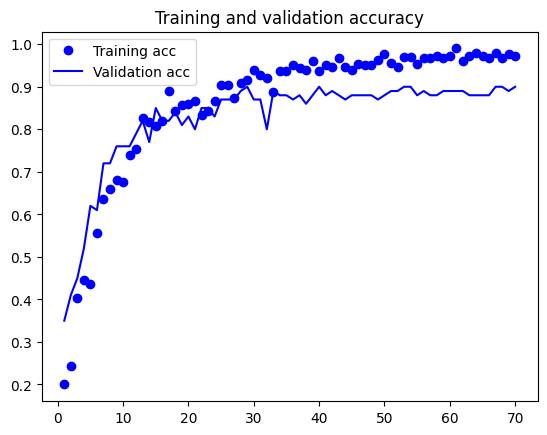

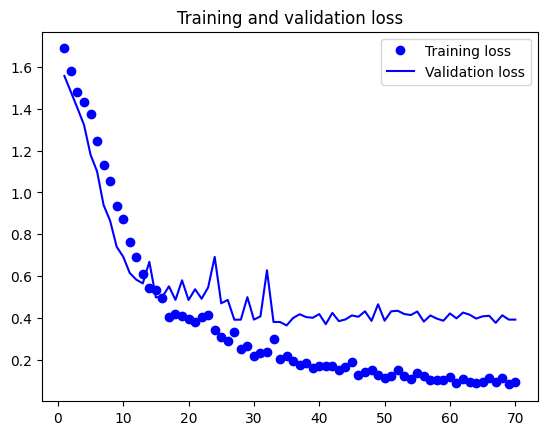

In [28]:
hd.plot_training_history(history)


In [31]:
# path              = './weights_fine_tuning/weights_60.keras'
# model = models.load_model('Fine_Tuned_NN.keras')
# model.load_weights(path)

train_generator = test_datagen.flow_from_directory(
                    train_dir,
                    target_size  =  (250, 250),
                    batch_size   =  25,
                    class_mode   =  'categorical')

folder_of_weights = './weights_fine_tuning/'

generators = [('Train', train_generator), ('Validation', validation_generator), ('Test', test_generator)]

df, checkpoint_names = hd.generate_evaluation_results(model, generators, folder_of_weights, initial_weight_index=40)
df


Found 300 images belonging to 5 classes.
4/4 [==============================] - 2s 343ms/step - loss: 0.3064 - acc: 0.9100


,Train Loss,Train Acc,Validation Loss,Validation Acc,Test Loss,Test Acc
weights_41,0.084411,0.976667,0.370242,0.88,0.361682,0.88
weights_42,0.082919,0.976667,0.424315,0.89,0.368068,0.89
weights_43,0.072205,0.986667,0.384877,0.88,0.358667,0.88
weights_44,0.086439,0.976667,0.392896,0.87,0.355603,0.89
weights_45,0.073289,0.980000,0.412073,0.88,0.362262,0.86
weights_46,0.061937,0.976667,0.405679,0.88,0.310106,0.91
weights_47,0.079951,0.970000,0.431854,0.88,0.376469,0.87
weights_48,0.054723,0.990000,0.386155,0.88,0.322240,0.87
weights_49,0.089867,0.963333,0.465528,0.87,0.368242,0.87
weights_50,0.044409,0.996667,0.386819,0.88,0.294013,0.89


### Selecting the best set of weights by comparing the performance on Training, Validation & Test Datasets

In [ ]:
hd.plot_evaluation_results(df, checkpoint_names, generators, figure_height=600, figure_width=1100)


### Loading the best set of weights


In [5]:
model = models.load_model('Fine_Tuned_NN.keras')
path              = './weights_fine_tuning/weights_70.keras'
model.load_weights(path)

# train_generator = test_datagen.flow_from_directory(
#                     train_dir,
#                     target_size  =  (250, 250),
#                     batch_size   =  25,
#                     class_mode   =  'categorical')

train_loss,      train_acc       = model.evaluate(train_generator)
validation_loss, validation_acc  = model.evaluate(validation_generator)
test_loss,       test_acc        = model.evaluate(test_generator)


4/4 [==============================] - 2s 324ms/step - loss: 0.3064 - acc: 0.9100


In [6]:
# model.save("Fine_Tuned_NN.keras")  # or .h5 if you prefer


#### **We choose the set no. 70 because it has the best combination of accuracy scores & losses across all datasets**


### Classification Report and Confusion Matrix on Test Dataset


Found 100 images belonging to 5 classes.
4/4 [==============================] - 1s 428ms/step
              precision    recall  f1-score   support

           0       0.86      0.90      0.88        20
           1       0.95      0.90      0.92        20
           2       0.86      0.95      0.90        20
           3       1.00      0.80      0.89        20
           4       0.91      1.00      0.95        20

    accuracy                           0.91       100
   macro avg       0.92      0.91      0.91       100
weighted avg       0.92      0.91      0.91       100



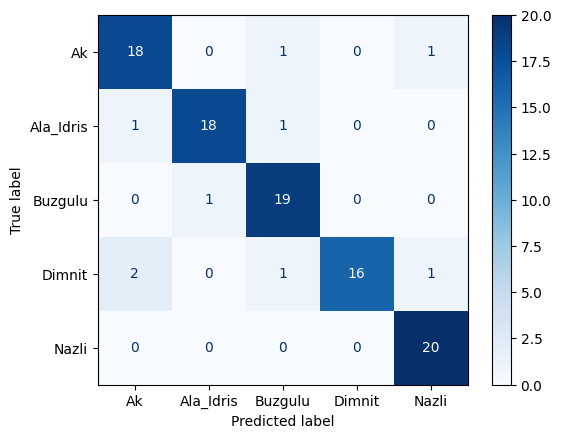

In [34]:
# Classification Report and Confusion Matrix

test_generator       = test_datagen.flow_from_directory(
                        test_dir,
                        target_size  =  (250, 250),
                        batch_size   =  100,
                        class_mode   =  'categorical')


batch, true_labels         =  next(test_generator)
true_labels                =  np.argmax(true_labels, axis = 1)
predicted_probabilities    =  model.predict(batch)
predicted_labels           =  np.argmax(predicted_probabilities, axis = 1)

# Generating a classification report and display a confusion matrix for the validation predictions
hd.classification_report_and_confusion_matrix(true_labels, predicted_labels)


In [35]:
label_replacements = {0: 'Ak', 1: 'Ala_Idris', 2: 'Buzgulu', 3: 'Dimnit', 4: 'Nazli'}

hd.classification_probability_displayer(predicted_probabilities, true_labels, label_replacements)


total_no_of_samples: 100

no_of_samples_of_class_Ak:   20
predicted_percentage_of_Ak:  21.0%
true_percentage_of_Ak:       20.0

no_of_samples_of_class_Ala_Idris:   20
predicted_percentage_of_Ala_Idris:  19.0%
true_percentage_of_Ala_Idris:       20.0

no_of_samples_of_class_Buzgulu:   20
predicted_percentage_of_Buzgulu:  22.0%
true_percentage_of_Buzgulu:       20.0

no_of_samples_of_class_Dimnit:   20
predicted_percentage_of_Dimnit:  16.0%
true_percentage_of_Dimnit:       20.0

no_of_samples_of_class_Nazli:   20
predicted_percentage_of_Nazli:  22.0%
true_percentage_of_Nazli:       20.0

no_of_samples_misclassified_as_Ak: 3
samples_misclassified_as_Ak_with_probability_greater_than_0.6: 100.0
samples_misclassified_as_Ak_with_probability_greater_than_0.7: 100.0
samples_misclassified_as_Ak_with_probability_greater_than_0.8: 33.33333333333333
samples_misclassified_as_Ak_with_probability_greater_than_0.9: 33.33333333333333
samples_misclassified_as_Ak_with_probability_greater_than_0.99: 0.0

n

# Conclusion


---
### **Which Model to Use in Production ?**

The second model—the fine-tuned one rather than the simple feature extraction model—achieved slightly higher accuracy on both the validation and test datasets. Its consistent performance across both sets makes it the more reliable choice for production deployment. Given its stability and improved results, the fine-tuned model has been selected for use in the final production pipeline.

---

### **Further Improvements and Opportunities**

There is clear potential for further improvement in model performance. One key opportunity lies in the quality of the dataset itself. As I am not personally familiar with the various species of grapevine leaves, I cannot visually confirm whether all images are correctly labeled or if there has been any misplacement or mixing of species in the dataset. Collaborating with a domain expert in grapevine classification could help refine the dataset and potentially boost model accuracy.

Another important factor is image resolution. In a separate notebook, it was verified that increasing the input image resolution from **250×250 to 300×300** led to a **significant accuracy improvement of at least 4%**. This clearly suggests that the lower resolution may be a limiting factor, contributing to the plateau in model performance. While we haven’t yet tested resolutions higher than 300×300, doing so could yield even better results and is a promising direction for future experimentation.
